In [194]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from itertools import chain

In [365]:
account = # Fill in account id

# Read in data

In [367]:
#pathlist = Path('Data/').glob('**/*.csv')
pathlist = Path('C:/Users/'+account+'/UCB/iPVU Web Scraping and trends - General/leonel_scrapped_data').glob('**/*.csv')
data = []
for path in pathlist:
    path_in_str = str(path)
    data.append(pd.read_csv(path_in_str))
    data[-1]['source'] = path_in_str.split('\\')[-1].split('_articles')[0]
    print(data[-1].head())
    print('-'*100)

   Unnamed: 0                                    ID             PublishedDate  \
0           0      DOI:10.1016/j.neurol.2020.04.004  2020-04-20T00:00:00.000Z   
1           1  DOI:10.1016/j.athoracsur.2020.04.007  2020-04-27T00:00:00.000Z   
2           2    DOI:10.1016/j.thromres.2020.04.024  2020-04-23T00:00:00.000Z   
3           3        DOI:10.1016/j.ekir.2020.04.001  2020-04-04T00:00:00.000Z   
4           4        DOI:10.1016/j.ando.2020.04.005  2020-04-21T00:00:00.000Z   

                                               Title  \
0  Guidance for the care of neuromuscular patient...   
1  Adult Cardiac Surgery and the COVID-19 Pandemi...   
2  Venous and arterial thromboembolic complicatio...   
3  Management of Patients on Dialysis and With Ki...   
4  Renin-angiotensin-aldosterone system and COVID...   

                                            Abstract  \
0  \n               Abstract\n               \n  ...   
1  \n               Abstract\n               \n  ...   
2  \n   

# Initial exploration data

In [360]:
[source.info() for source in data]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25 non-null     int64 
 1   ID               25 non-null     object
 2   PublishedDate    25 non-null     object
 3   Title            25 non-null     object
 4   Abstract         24 non-null     object
 5   PublicationName  25 non-null     object
 6   Creator          25 non-null     object
 7   Authors          25 non-null     object
 8   Link             25 non-null     object
 9   DOI              25 non-null     object
 10  Availability     25 non-null     object
 11  PII              25 non-null     object
 12  source           25 non-null     object
dtypes: int64(1), object(12)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         ------

[None, None, None, None, None]

In [361]:
publ_per_source = pd.DataFrame(columns= ['source','nb_publ'])
for data_source in data:
    publ_per_source = publ_per_source.append({'source': data_source.source[0], 'nb_publ': len(data_source.index)}, ignore_index=True)

print(publ_per_source)

       source nb_publ
0    elsevier      25
1        emea      41
2        nejm      51
3      pubmed      10
4  the_lancet      39


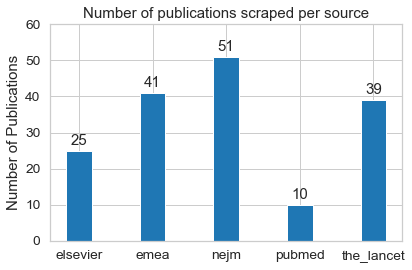

In [362]:
sources = publ_per_source.source
counts = publ_per_source.nb_publ

x = np.arange(len(sources))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, counts, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Publications')
ax.set_title('Number of publications scraped per source')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.set_ylim([0, 60])
# ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

# Entity Recognition with scispacy

## Source
https://github.com/maheshdosm/Bio-NER/blob/master/Medical_NER.ipynb

https://medium.com/@maheshdmahi/scispacy-for-bio-medical-named-entity-recognition-ner-63ed548f1df0

https://allenai.github.io/scispacy/

## Load the necessary packages

In [368]:
import scispacy
import spacy
import en_core_sci_sm   #The model we are going to use
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

## Define the model

In [369]:
nlp = spacy.load("en_core_sci_sm")   #Define the pre-trained model.

## Input

In [370]:
print(data[1].source[0])

emea


In [371]:
print(data[1].Abstract.head())

0    EMA endorsed a joint statement by the members ...
1    EMA provided an update on the measures EU auth...
2    EMA and the national competent authorities rem...
3    EMA announced that essential work to combat th...
4    EMA reminded patients and healthcare professio...
Name: Abstract, dtype: object


## Finding the sentences and entities in the texts

In [372]:
data[1]['sentences'] = data[1]['Abstract'].apply(lambda text: nlp(text))
data[1]['entities'] = data[1]['sentences'].apply(lambda sentences: sentences.ents)

In [373]:
#Select first abstract
abstract = data[1].iloc[0,-2]

In [374]:
#List the sentences of the first abstract
print(list(abstract.sents))

[EMA endorsed a joint statement by the members of the International Coalition of Medicines Regulatory Authorities (ICMRA)., The statement commits the international regulators to strengthen global collaboration to facilitate rapid development, approval and roll-out of safe and effective medicines against COVID-19.]


In [375]:
#Print the Medical or Clinical entities present in the first abstract
print(list(abstract.ents))

[EMA, endorsed, joint statement, members, International Coalition, Medicines Regulatory Authorities, ICMRA, statement commits, international regulators, global, collaboration, development, approval, roll-out, effective, medicines, COVID-19]


## Visualize

In [376]:
displacy.render(next(abstract.sents), style='dep', jupyter=True)

In [377]:
displacy.render(abstract, style="ent")

## Link abbreviations

In [378]:
# Add the abbreviation pipe to the spacy pipeline.
try:
    abbreviation_pipe = AbbreviationDetector(nlp)
    nlp.add_pipe(abbreviation_pipe)
except:
  print("AbbreviationDetector already exists")

In [379]:
#Print the Abbreviation and it's definition
print("Abbreviation", "\t", "Definition")
for abstract in data[1]['sentences']:
    for abrv in abstract._.abbreviations:
        print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form}")

Abbreviation 	 Definition


In [380]:
linker = UmlsEntityLinker(resolve_abbreviations=True)
nlp.add_pipe(linker)

c:\python_3.7.4\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\python_3.7.4\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Look at a random entitiy

In [381]:
# Let's look at a random entity!
entity = data[1]['entities'][0][0]

print("Name: ", entity)

Name:  EMA


In [382]:
# Each entity is linked to UMLS with a score
# (currently just char-3gram matching).
for umls_ent in entity._.umls_ents:
    print(linker.umls.cui_to_entity[umls_ent[0]])

In [383]:
for abstract in data[1]['entities']:
    for ent in abstract:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print('-'*50)

EMA 0 3 ENTITY
endorsed 4 12 ENTITY
joint statement 15 30 ENTITY
members 38 45 ENTITY
International Coalition 53 76 ENTITY
Medicines Regulatory Authorities 80 112 ENTITY
ICMRA 114 119 ENTITY
statement commits 126 143 ENTITY
international regulators 148 172 ENTITY
global 187 193 ENTITY
collaboration 194 207 ENTITY
development 228 239 ENTITY
approval 241 249 ENTITY
roll-out 254 262 ENTITY
effective 275 284 ENTITY
medicines 285 294 ENTITY
COVID-19 303 311 ENTITY
--------------------------------------------------
EMA 0 3 ENTITY
update 16 22 ENTITY
measures 30 38 ENTITY
EU 39 41 ENTITY
authorities 42 53 ENTITY
availability of 100 115 ENTITY
medicines 116 125 ENTITY
pandemic 137 145 ENTITY
meeting 159 166 ENTITY
EU 174 176 ENTITY
Group 196 201 ENTITY
Shortages 205 214 ENTITY
Medicines 218 227 ENTITY
Major Events 238 250 ENTITY
--------------------------------------------------
EMA 0 3 ENTITY
national competent authorities 12 42 ENTITY
patients 52 60 ENTITY
suspected 66 75 ENTITY
COVID-19 89 

## Generate wordcloud

In [384]:
# Start with loading all necessary libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### From entities:

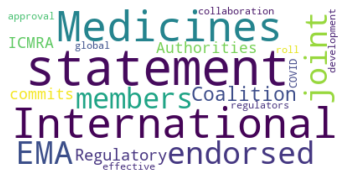

In [385]:
# Start with entities of first abstract:
text = ' '.join([str(ent) for ent in data[1]['entities'][0]]) 

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### From abstract:

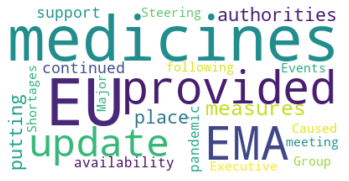

In [386]:
# Start with entities of first abstract:
text = data[1]['Abstract'][1]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### All abstracts from source:

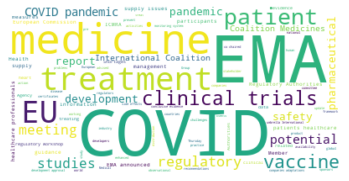

In [133]:
# Entities of first source:
text = ' '.join([str(ent) for ent in data[1]['entities']]) 

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", random_state=12).generate(text) #fix seed to 12

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#save image
path = "wordclouds/"+data[0].source[0]+".png"
wordcloud.to_file(path)

### All sources:

elsevier


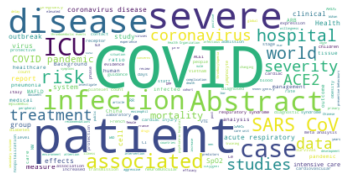

emea


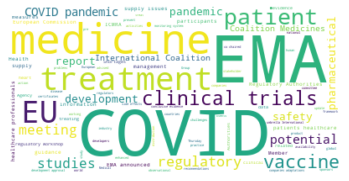

nejm


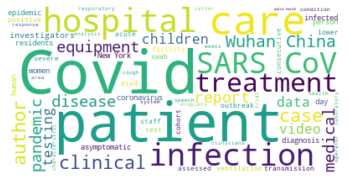

pubmed


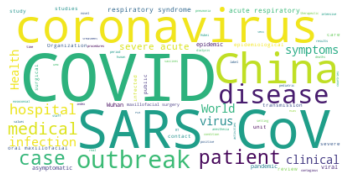

the_lancet


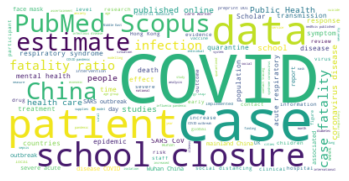

In [388]:
for data_source in data:
    print(data_source.source[0])
    if 'Abstract' in data_source:        
        data_source['sentences'] = data_source['Abstract'].fillna('').apply(lambda text: nlp(text))
        data_source['entities'] = data_source['sentences'].apply(lambda sentences: sentences.ents)   
        
        # Entities of source:
        text = ' '.join([str(ent) for ent in data_source['entities']]) 
    
    elif 'Topics' in data_source:
        # Entities of source:
        text = ' '.join([str(ent) for ent in data_source['Topics']]) 
        
    elif 'Title' in data_source:
        data_source['sentences'] = data_source['Title'].fillna('').apply(lambda text: nlp(text))
        data_source['entities'] = data_source['sentences'].apply(lambda sentences: sentences.ents)   
        
        # Entities of source:
        text = ' '.join([str(ent) for ent in data_source['entities']]) 
    
    else:
        continue

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white", random_state=12).generate(text) #fix seed to 12

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    #save image
    path = "C:/Users/"+account+"/UCB/iPVU Web Scraping and trends - General/jasmien_images/wordclouds_entity_recognition/"+data_source['source'][0]+".png"
    wordcloud.to_file(path)

# Count frequency of terms

In [389]:
from collections import Counter

In [390]:
[source.head() for source in data]

[   Unnamed: 0                                    ID             PublishedDate  \
 0           0      DOI:10.1016/j.neurol.2020.04.004  2020-04-20T00:00:00.000Z   
 1           1  DOI:10.1016/j.athoracsur.2020.04.007  2020-04-27T00:00:00.000Z   
 2           2    DOI:10.1016/j.thromres.2020.04.024  2020-04-23T00:00:00.000Z   
 3           3        DOI:10.1016/j.ekir.2020.04.001  2020-04-04T00:00:00.000Z   
 4           4        DOI:10.1016/j.ando.2020.04.005  2020-04-21T00:00:00.000Z   
 
                                                Title  \
 0  Guidance for the care of neuromuscular patient...   
 1  Adult Cardiac Surgery and the COVID-19 Pandemi...   
 2  Venous and arterial thromboembolic complicatio...   
 3  Management of Patients on Dialysis and With Ki...   
 4  Renin-angiotensin-aldosterone system and COVID...   
 
                                             Abstract  \
 0  \n               Abstract\n               \n  ...   
 1  \n               Abstract\n               \n

In [391]:
entities = []

for data_source in data:
    if 'entities' in data_source: 
        for item in data_source['entities']:
            for i in item:
                entities.append(str(i))
    elif 'Topics' in data_source:
        for item in data_source['Topics']:
            entities.append(item)
    else:
        continue
        
entities.sort()
entity_overview = Counter(entities)
print(entity_overview)

Counter({'COVID-19': 558, 'cases': 270, 'patients': 266, 'China': 253, 'quarantine': 164, 'outbreak': 155, 'SARS': 150, 'Wuhan': 133, 'data': 133, 'severe': 120, 'people': 119, 'PubMed\nScopus': 117, 'infection': 103, 'pandemic': 90, 'SARS-CoV-2': 85, 'transmission': 84, 'estimates': 79, 'epidemic': 74, 'Hubei': 73, 'published online': 73, 'quarantined': 72, 'school closures': 71, 'risk': 70, 'infected': 69, 'associated with': 67, 'countries': 67, 'studies': 67, 'years': 66, 'study': 64, 'age': 63, 'mainland': 63, 'coronavirus disease': 61, 'days': 61, 'case fatality ratio': 60, 'treatment': 59, 'symptoms': 56, 'evidence': 55, 'EMA': 53, 'disease': 53, 'Beijing': 52, 'children': 51, 'individuals': 51, 'schools': 50, 'measures': 47, 'deaths': 46, 'provinces': 45, 'coronavirus': 44, 'social distancing': 44, 'implemented': 43, 'severity': 42, 'WHO': 41, 'impact': 41, 'interventions': 41, 'potential': 41, 'mortality': 40, 'outside': 40, 'accessed': 39, 'information': 39, 'Lancet': 38, 'Sch

In [392]:
most_common = Counter(entity_overview).most_common(50)
print(most_common)

[('COVID-19', 558), ('cases', 270), ('patients', 266), ('China', 253), ('quarantine', 164), ('outbreak', 155), ('SARS', 150), ('Wuhan', 133), ('data', 133), ('severe', 120), ('people', 119), ('PubMed\nScopus', 117), ('infection', 103), ('pandemic', 90), ('SARS-CoV-2', 85), ('transmission', 84), ('estimates', 79), ('epidemic', 74), ('Hubei', 73), ('published online', 73), ('quarantined', 72), ('school closures', 71), ('risk', 70), ('infected', 69), ('associated with', 67), ('countries', 67), ('studies', 67), ('years', 66), ('study', 64), ('age', 63), ('mainland', 63), ('coronavirus disease', 61), ('days', 61), ('case fatality ratio', 60), ('treatment', 59), ('symptoms', 56), ('evidence', 55), ('EMA', 53), ('disease', 53), ('Beijing', 52), ('children', 51), ('individuals', 51), ('schools', 50), ('measures', 47), ('deaths', 46), ('provinces', 45), ('coronavirus', 44), ('social distancing', 44), ('implemented', 43), ('severity', 42)]


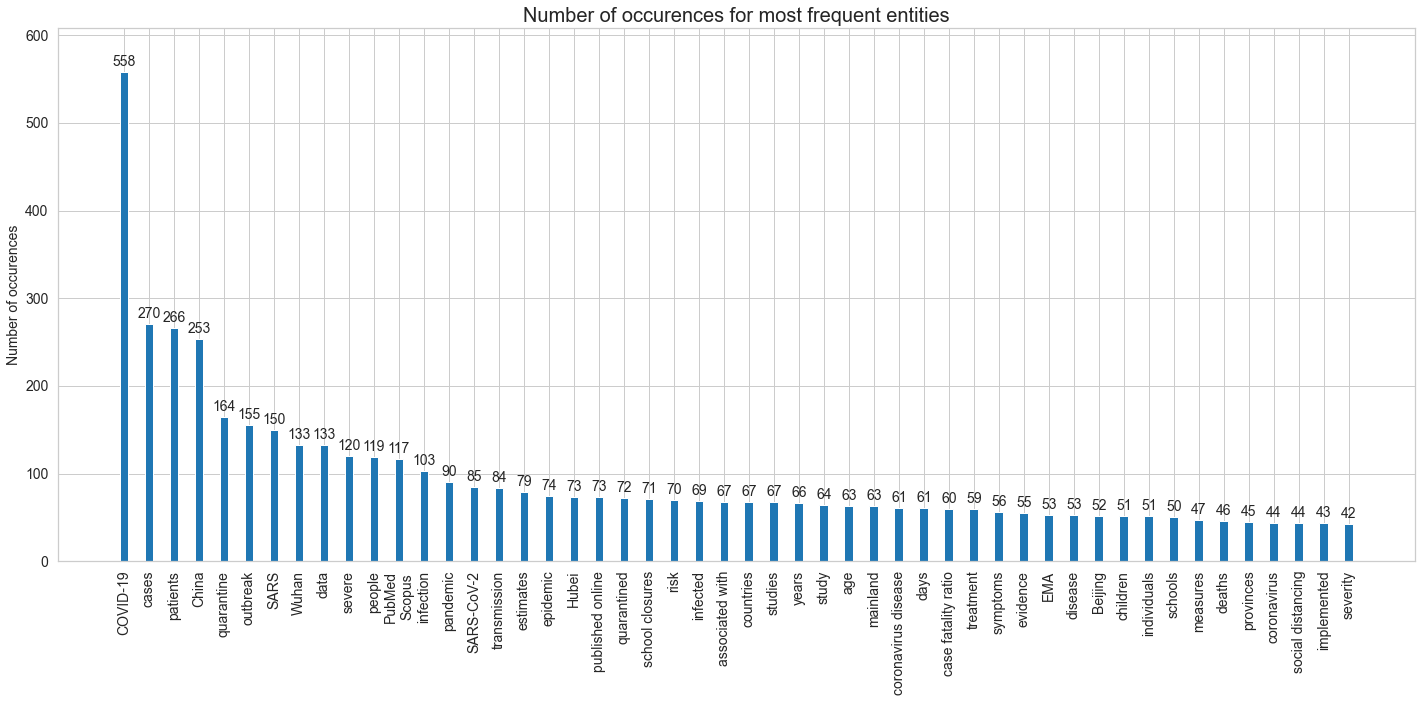

In [393]:
# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
terms = list(zip(*most_common))[0]
counts = list(zip(*most_common))[1]

x = np.arange(len(terms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x, counts, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of occurences', fontsize=14)
ax.set_title('Number of occurences for most frequent entities', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(terms)
ax.set_ylim([0, max(counts)+50])
ax.tick_params(labelsize=14)
plt.xticks(rotation=90)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)


autolabel(rects1)

fig.tight_layout()

plt.show()

## Plot per source

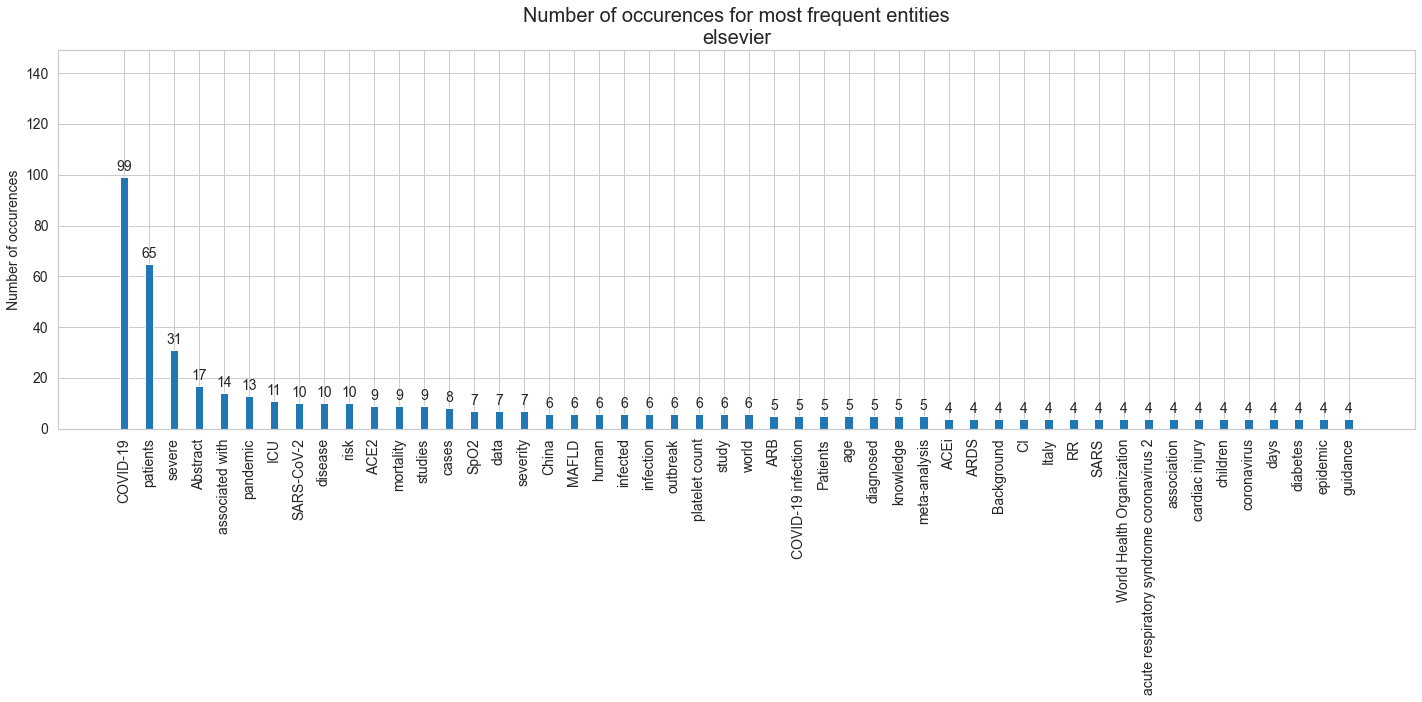

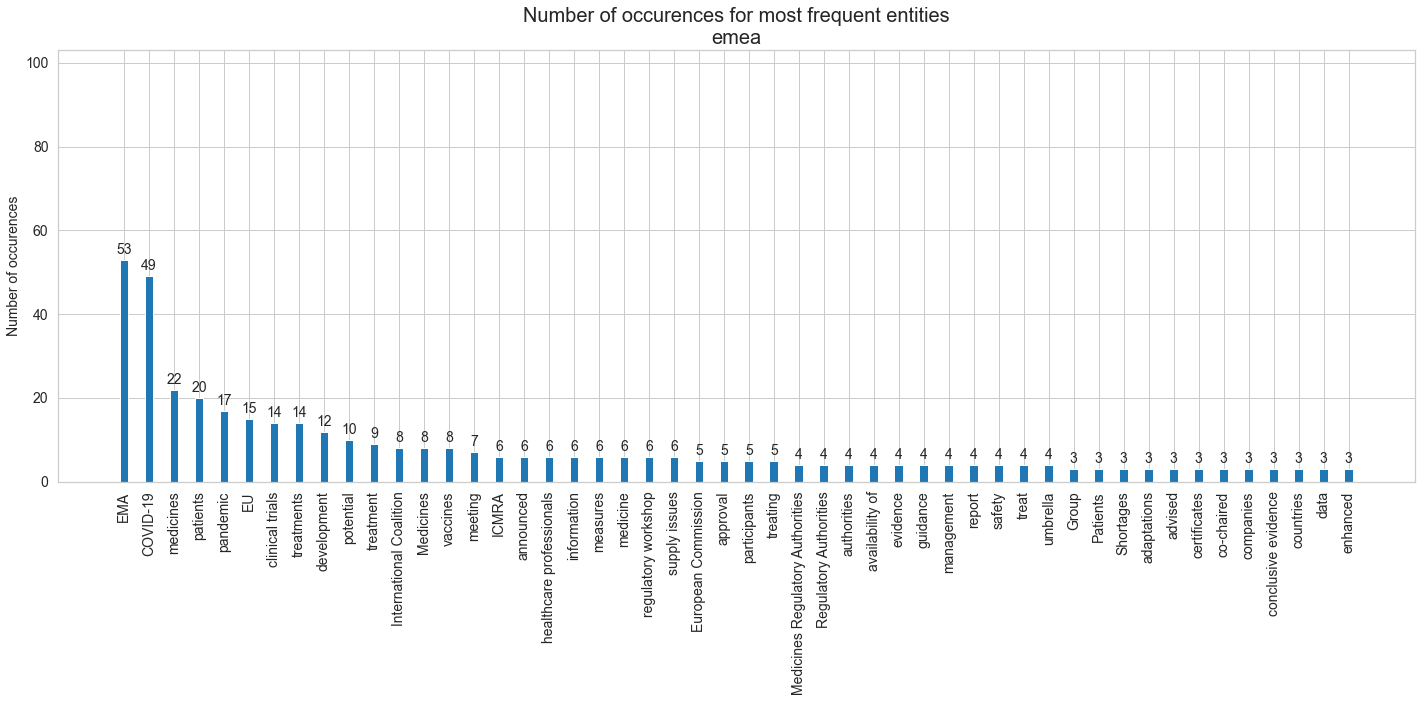

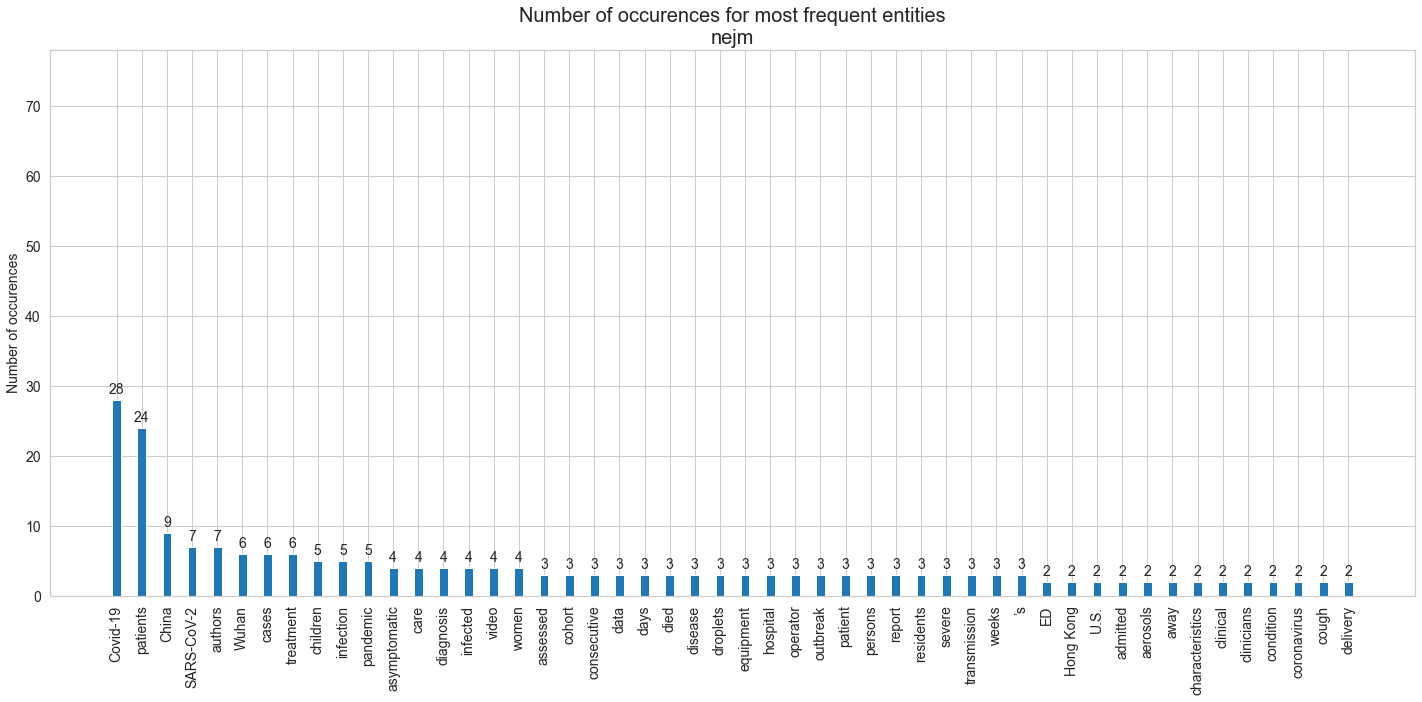

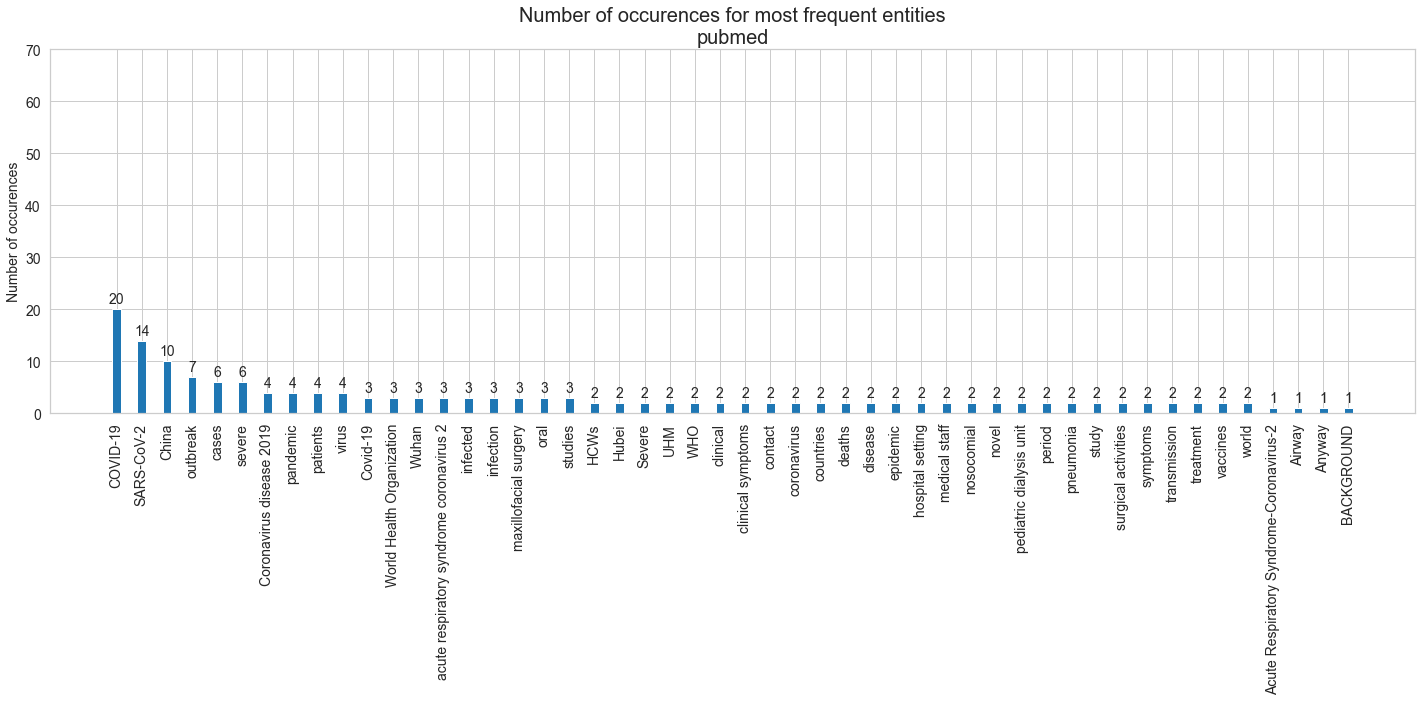

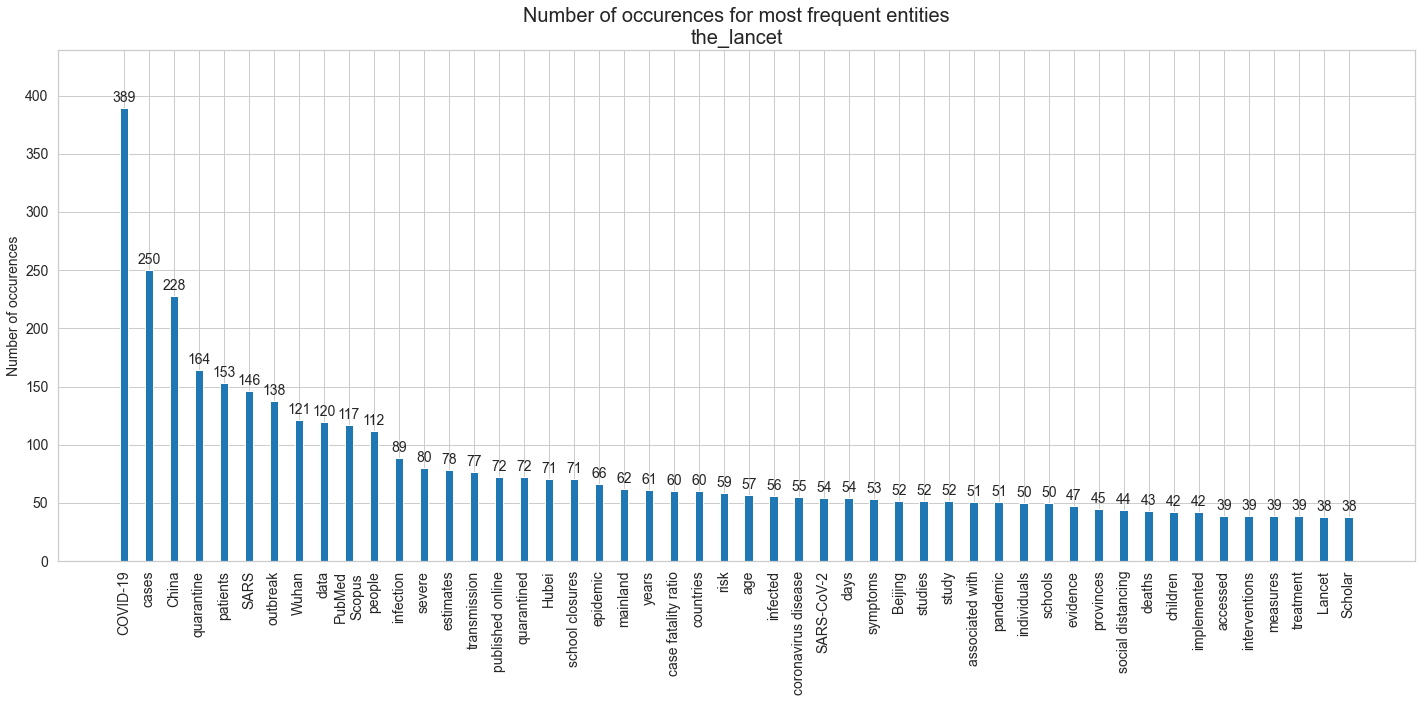

In [395]:
for data_source in data:
    entities = []
    if 'entities' in data_source: 
        for item in data_source['entities']:
            for i in item:
                entities.append(str(i))
    elif 'Topics' in data_source:
        for item in data_source['Topics']:
            entities.append(item)
    else:
        continue
        
    entities.sort()
    entity_overview = Counter(entities)
    
    most_common = entity_overview.most_common(50)
    
    terms = list(zip(*most_common))[0]
    counts = list(zip(*most_common))[1]

    x = np.arange(len(terms))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(20,10))
    rects1 = ax.bar(x, counts, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of occurences', fontsize=14)
    ax.set_title('Number of occurences for most frequent entities\n'+data_source.source[0], fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(terms)
    ax.set_ylim([0, max(counts)+50])
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=90)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14)


    autolabel(rects1)

    fig.tight_layout()
    
    #save image
    path = "C:/Users/"+account+"/UCB/iPVU Web Scraping and trends - General/jasmien_images/entity_counts/"+data_source['source'][0]+".png"
    fig.savefig(path)